# Data Visualization: Ford Go Bike
## by Zakariya Boutayeb

## Investigation Overview

> In this project, we are going to use Python visualization libraries, including matplotlib and seaborn, to systematically explore Ford GoBike System Data dataset, starting from plots of single variables and building up to plots of multiple variables. Then, we are going to produce a presentation that illustrates interesting properties, trends, and relationships that will be discovered in the dataset.

## Dataset Overview

> Ford GoBike System Data includes information about approximately 183,412 bike rides covering the greater San Francisco Bay area on february, 2019. The database have some quality issues that have been cleaned which leads that many data were excluded from our analysis. After data cleaning, the cleaned data frame contains 17 descriptors for around 175 thousand rides.

In [59]:
# import all packages and set plots to be embedded inline
#Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import calendar
import math
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [60]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Usage by User Type:

> Ford GoBike System currently offers 3 subscribtion types: Single Rides, Access Pass and Monthly Memberships. GoBike users are mostly subscribers with 90.5% of all bikers while customers represent only 9.5%. This means that commuters prefer subscribing to the monthly memberships while customers who are tourists in most cases, prefer holding a single-ride or day pass.

In [61]:
#create copy of original dataframe
df_clean = df.copy()

# replace null values with NAN
df_clean = df_clean.replace(0, np.NAN)

# drop all NAN's rows from our dataset
df_clean = df_clean.dropna()

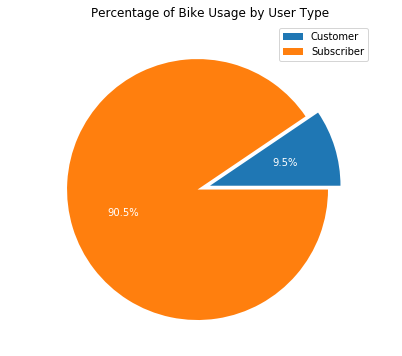

In [62]:
# plot Bike Usage by User Type

total_trips = df_clean['duration_sec'].count()
customer_trips = df_clean[df_clean['user_type']=='Customer']['duration_sec'].count() / total_trips
subscriber_trips = df_clean[df_clean['user_type']=='Subscriber']['duration_sec'].count() / total_trips

plt.figure(figsize=(6,6))
plt.pie([customer_trips,subscriber_trips], explode=(0, 0.1), labels=['Customer', 'Subscriber'], 
        autopct='%1.1f%%', startangle=0, textprops={'color':'white'})
plt.title("Percentage of Bike Usage by User Type")
plt.legend()
plt.show();

## Bike Usage by Day of the Week and User Type:

> The ages of the majority of users range from mid-twenties to mid-thirties, with a median of 32 and mean of 34.19

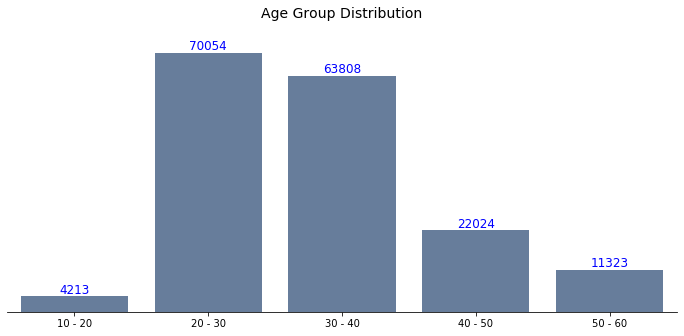

In [63]:
# Create member_age column
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

# Create age group from member age
df_clean['age_group'] = df_clean['member_age'] .apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x = "age_group", data = df_clean,
              color = sns.color_palette('viridis')[1],
              order = ['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60'], alpha=0.8)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color = "blue", size=12)

plt.title('Age Group Distribution\n', size=14)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

## Distribution of bike rides by the top station during weekdays:

> The most active stations are San Francisco Caltrain Station 2 (Townsend St at 4th St), Market St at 10th St, Montgomery St BART Station (Market St at 2nd St), and also San Francisco Ferry Building (Harry Bridges Plaza) which are connceted to mass public transportation (Train, Bart and Ferry). Commuters have many options to get to the city either by using the train, bus service and also by using the ferry that connects Oakland, Alameda, and Vallejo to the city. While, many subscribers are commuting to the city for work and, therefore, bike rentals will concentrate near major transit stations during the rush hours of 8 AM and 5 PM. Customers might be tourists who like to ride a bike during the weekend. The reason why, the number of trips increases during weekends in the tourist attractions like Ferry building and Embarcadero (close to piers). 

In [64]:
# Fix issue with numeric appendix for data in start_time and end_time
df_clean[['start_time', 'end_time']] = df_clean[['start_time', 'end_time']].apply(lambda x: x.str.replace(r'\..*', ''))

In [65]:
# Convert start_time and end_time into proper date/time format
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'], errors ='coerce', format = '%Y-%m-%d %H:%M:%S')
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [66]:
# Extract date and time from the start_time and end_time
df_clean['start_date'] = pd.to_datetime(df_clean['start_time']).dt.date
df_clean['end_date'] = pd.to_datetime(df_clean['end_time']).dt.date
df_clean['start_time'] = df_clean['start_time'].dt.time
df_clean['end_time'] = df_clean['end_time'].dt.time

# set start_date and end_date to datetime
df_clean['start_date'] = pd.to_datetime(df_clean['start_date'])
df_clean['end_date'] = pd.to_datetime(df_clean['end_date'])

# extract day from start_time column
df_clean['weekday'] = df_clean['start_date'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [67]:
# Create a new column for duration_min
df_clean['duration_min'] = df_clean['duration_sec'] / 60 

In [68]:
# Subset the dataset by keeping only top 5 start station with high traffics
list_st_station = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
                  'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)']
df_Top5_start = df_clean.loc[df_clean['start_station_name'].isin(list_st_station)]
df_Top5_start['start_station_name'].value_counts()

# Subset the dataset by keeping only top 5 end station 
list_end_station = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Market St at 10th St', 
                   'Montgomery St BART Station (Market St at 2nd St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 
                   'San Francisco Caltrain (Townsend St at 4th St)']
df_Top5_end = df_clean.loc[df_clean['end_station_name'].isin(list_end_station)]

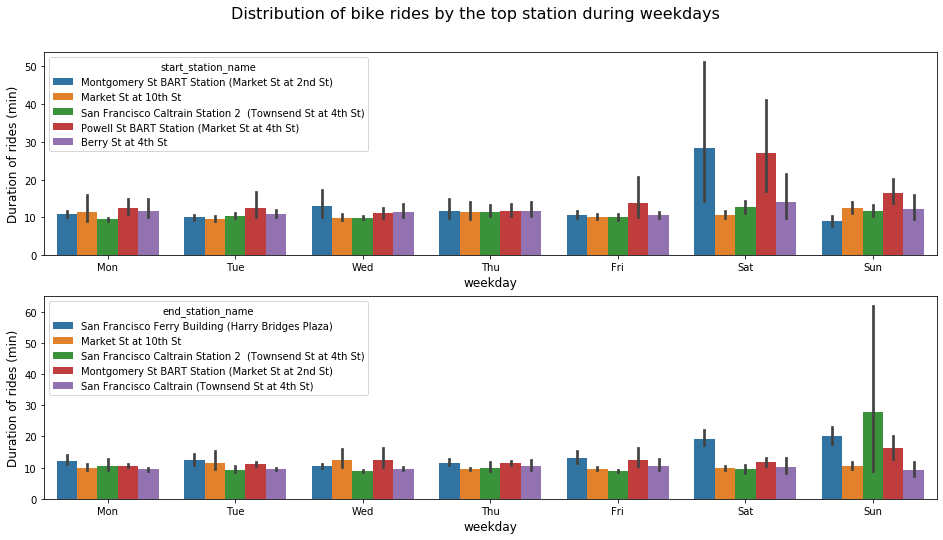

In [69]:
# Multivariate plot of top start stations and top end stations vs duration and weekdays
plt.figure(figsize = [16, 8])
base_color = sb.color_palette()[2]

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories = weekday)

# plot top start stations vs duration and weekdays
plt.subplot(2, 1, 1)
df_Top5_start['weekday'] = df_Top5_start['weekday'].astype(weekdaycat)
sb.barplot(data = df_Top5_start, x ='weekday', y ='duration_min', hue ='start_station_name')
plt.xlabel('weekday', fontsize = 12)
plt.ylabel('Duration of rides (min)', fontsize = 12)

# plot top end stations vs duration and weekdays
plt.subplot(2, 1, 2)
df_Top5_end['weekday'] = df_Top5_end['weekday'].astype(weekdaycat)
sb.barplot(data = df_Top5_end, x ='weekday', y ='duration_min', hue ='end_station_name')
plt.xlabel('weekday', fontsize=12)
plt.ylabel('Duration of rides (min)', fontsize=12)

plt.subplots_adjust(top = 0.9)
plt.suptitle('Distribution of bike rides by the top station during weekdays', fontsize=16);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!